PHYS-E0415 sheet 2, Aapo Kössi 787459

C:\Users\aapok\AppData\Local\Temp\ipykernel_5112\2630720815.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png','pdf')


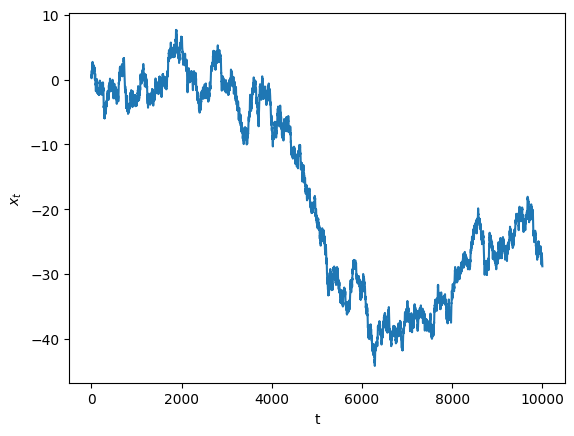

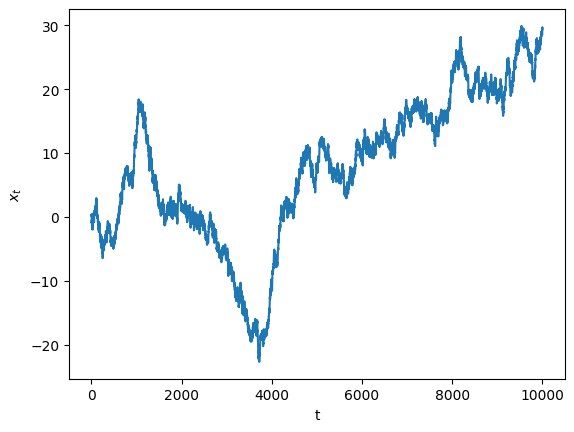

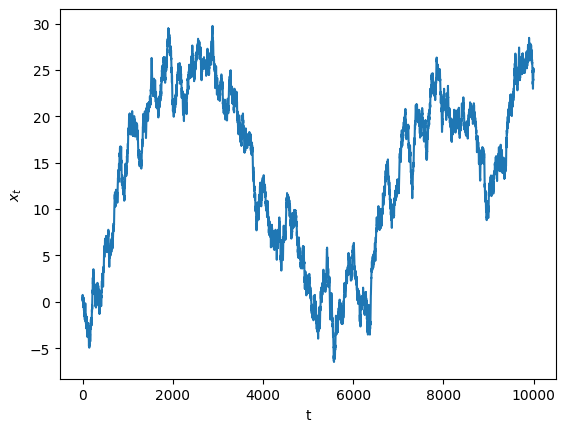

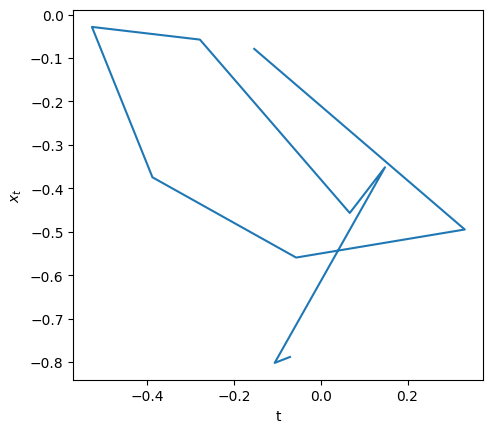

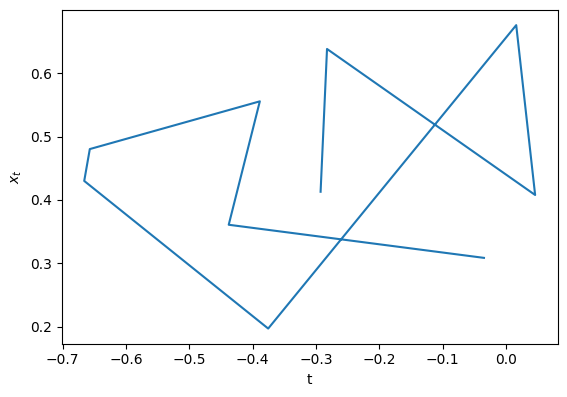

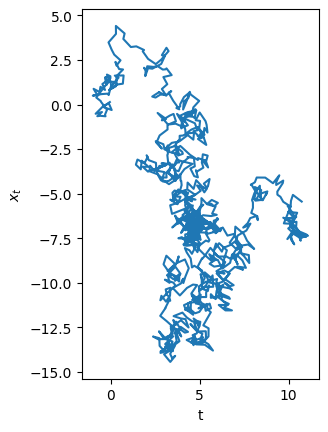

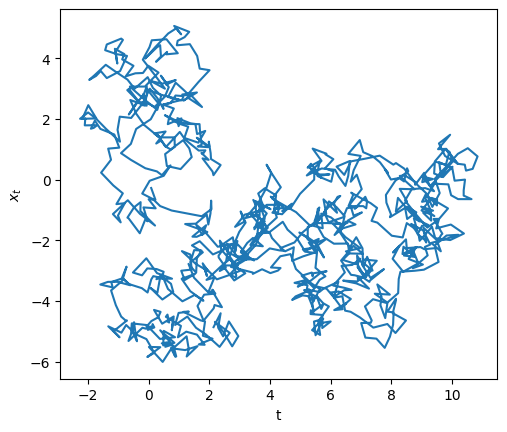

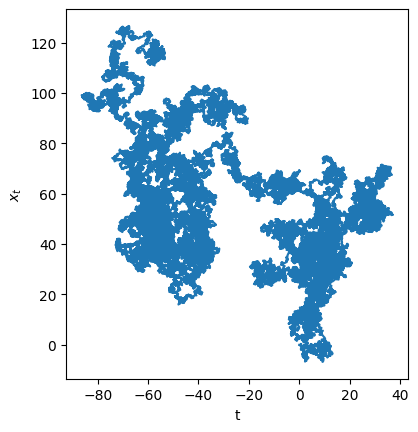

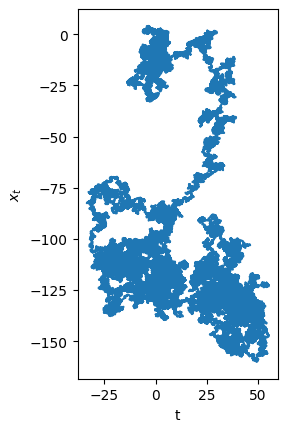

In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

MAX_STEP = 1/2

seed = 42
rng = np.random.default_rng(seed=seed)

def get_walks(steps, dim, num_walks = 1, max_stepsize = MAX_STEP, rng = rng):
    steps = rng.uniform(-max_stepsize, max_stepsize, (num_walks, steps, dim))
    x = np.cumsum(steps, axis=-2)
    return x

def plot_xt_vs_t(x):
    fig, ax = plt.subplots()
    ax.plot(x[:,0])
    ax.set_ylabel("$x_{t}$")
    ax.set_xlabel("t")
    return fig

def plot_y_vs_x(x):
    fig, ax = plt.subplots()
    ax.plot(x[:,0], x[:,1])
    ax.set_aspect("equal")
    ax.set_ylabel("$x_{t}$")
    ax.set_xlabel("t")
    return fig

"""
-------
task a)
-------
"""
xt = get_walks(10000, 1, 3)
for walk in xt:
    plot_xt_vs_t(walk)

# just generate 100000 steps for all, we can plot just the beginning to get 10 or 1000 steps
xyt = get_walks(100000, 2, 6)
for n, walk in enumerate(xyt):
    n_steps = [10, 1000, 100000][n//2]
    plot_y_vs_x(walk[:n_steps])
plt.show()

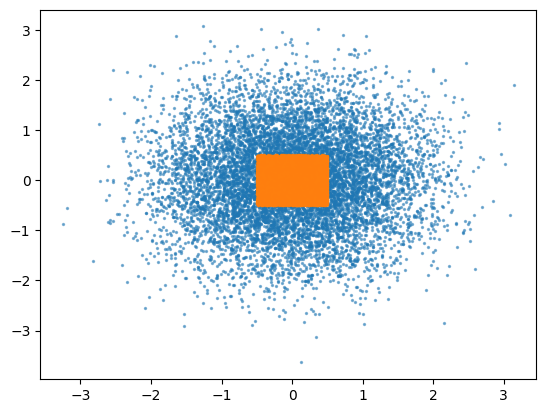

In [2]:

"""
-------
task b)
-------
"""
def get_endpoints(W,N,d):
    return get_walks(N,d,W)[:,-1,:]

onestep = get_endpoints(10000, 1, 2)
tenstep = get_endpoints(10000, 10, 2)
fig, ax = plt.subplots()
ax.scatter(tenstep[...,0], tenstep[...,1], 2,alpha=0.5)
ax.scatter(onestep[...,0], onestep[...,1], 2,alpha=0.5)
plt.show()

RMS value of step size is 0.28867513459481287


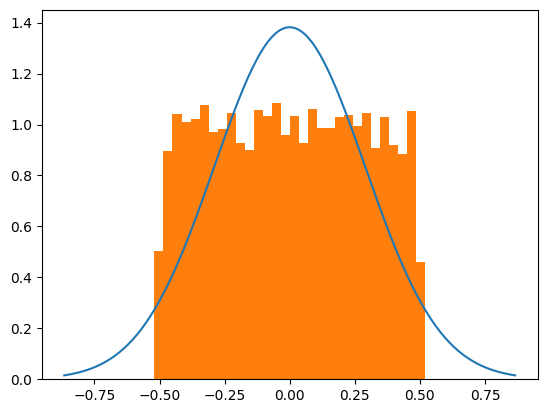

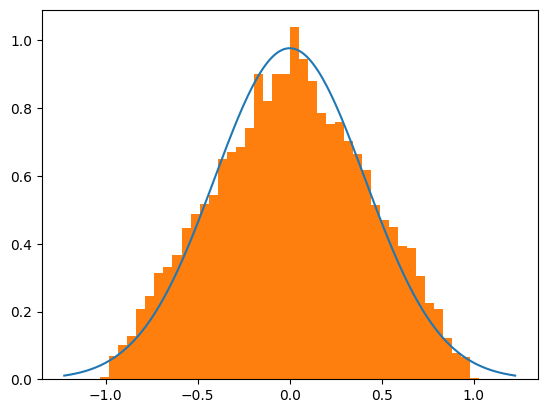

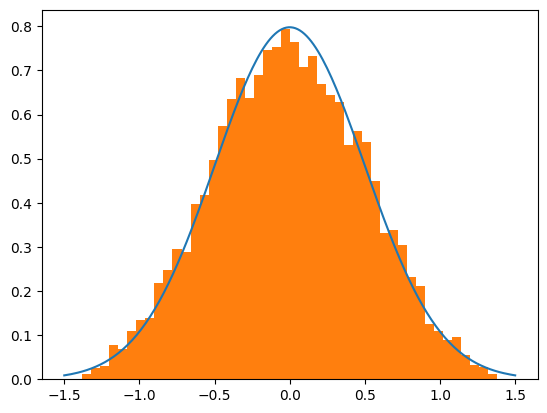

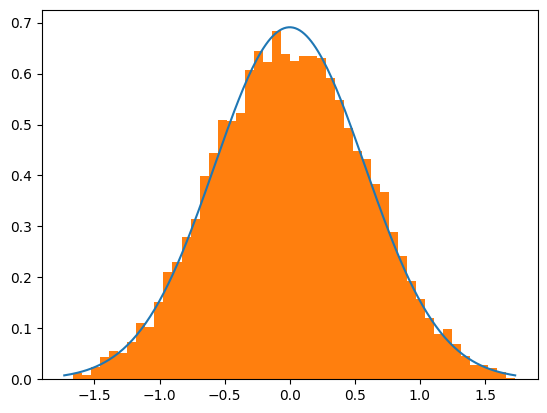

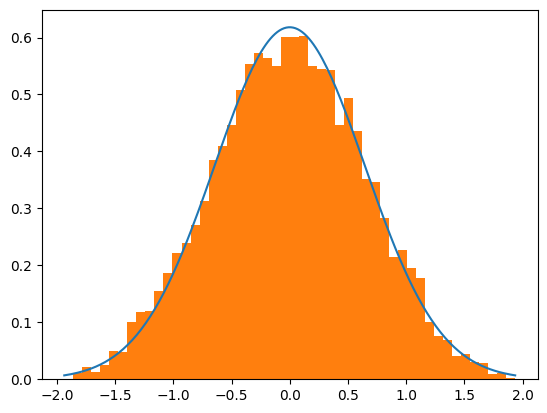

In [3]:

"""
-------
task c)
-------
"""

# rms value of the step size calculated by integrating x^2 from -1/2 from 1/2 (our pdf is 1 from -1/2 to 1/2 )
# and taking the square root of the result
# integral of x^2 is 1/3*x^3 + C
def F(x):
    return 1/3*x**3
mean_square_step = F(1/2)-F(-1/2)
rms_step = np.sqrt(mean_square_step)
print(f"RMS value of step size is {rms_step}")

def endpoint_hist(endpoints, n_steps, step_rms):
    fig, ax = plt.subplots()
    sigma = np.sqrt(n_steps)*step_rms
    plotrange = 3*sigma*np.array([-1,1])
    s = np.linspace(*plotrange, 200)
    rho = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-s**2/(2*sigma**2))
    w = endpoints.shape[0]
    ax.plot(s, rho)
    ax.hist(endpoints, bins = 50, range = (-3*sigma, 3*sigma), density=True)
    return fig

for n in range(1,6):
    endpoint_hist(get_endpoints(10000,n,1), n, rms_step)
plt.show()